In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import itertools as it
import datetime

import warnings

warnings.filterwarnings(action='ignore')

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [272]:
df = pd.read_excel("./data_set/nts_naver_trends.xlsx", header= 6)

In [273]:
df.head()

,날짜,국세청
0,2016-01-01,100.00000
1,2016-02-01,23.14133
2,2016-03-01,13.91950
3,2016-04-01,11.41206
4,2016-05-01,26.82556


In [274]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
날짜     50 non-null object
국세청    50 non-null float64
dtypes: float64(1), object(1)
memory usage: 928.0+ bytes


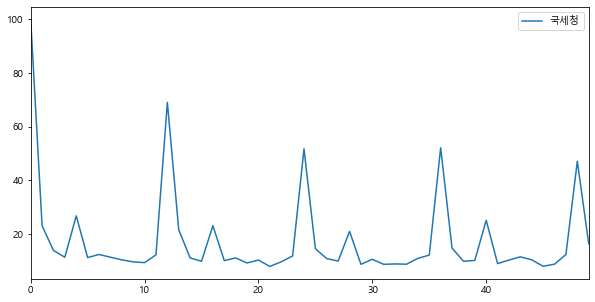

In [276]:
plt.rcParams['figure.figsize'] = [10, 5]
df.plot()

In [278]:
df['date'] = pd.to_datetime(df['날짜'])

In [279]:
df.head()

,날짜,국세청,date
0,2016-01-01,100.00000,2016-01-01
1,2016-02-01,23.14133,2016-02-01
2,2016-03-01,13.91950,2016-03-01
3,2016-04-01,11.41206,2016-04-01
4,2016-05-01,26.82556,2016-05-01


In [280]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
날짜      50 non-null object
국세청     50 non-null float64
date    50 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 1.3+ KB


In [281]:
df['month'] = df['date'].dt.month

In [282]:
df.head()

,날짜,국세청,date,month
0,2016-01-01,100.00000,2016-01-01,1
1,2016-02-01,23.14133,2016-02-01,2
2,2016-03-01,13.91950,2016-03-01,3
3,2016-04-01,11.41206,2016-04-01,4
4,2016-05-01,26.82556,2016-05-01,5


In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
날짜       50 non-null object
국세청      50 non-null float64
date     50 non-null datetime64[ns]
month    50 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 1.7+ KB


In [284]:
df['month'] = df['month'].astype('str')

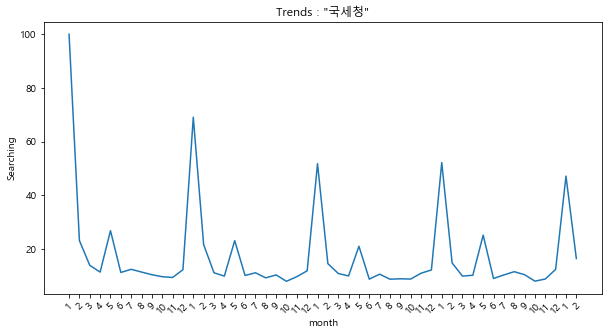

In [285]:
plt.rcParams['figure.figsize'] = [10, 5]
plt.plot(df.국세청)
plt.xticks(df.index, df.month, rotation=45)
plt.xlabel('month')
plt.ylabel('Searching')
plt.title('Trends : "국세청"')
plt.show()

In [286]:
df['year'] = df['date'].dt.year
df['year'] = df['year'].astype('str')

In [287]:
df.head()

,날짜,국세청,date,month,year
0,2016-01-01,100.00000,2016-01-01,1,2016
1,2016-02-01,23.14133,2016-02-01,2,2016
2,2016-03-01,13.91950,2016-03-01,3,2016
3,2016-04-01,11.41206,2016-04-01,4,2016
4,2016-05-01,26.82556,2016-05-01,5,2016


In [288]:
for i in df.year.unique():
    
    temp = df[df['year']==str(i)]
    temp.rename(columns={'국세청':str(i)}, inplace = True)
    temp = temp[['month',str(i)]]
        
    if i == "2016" :
        
        per_year = temp        
    
    else :
        
        per_year = per_year.merge(temp, how = "left", on = "month")    

In [289]:
per_year

,month,2016,2017,2018,2019,2020
0,1,100.00000,69.08220,51.78278,52.18139,47.15189
1,2,23.14133,21.63739,14.53914,14.81884,16.44613
2,3,13.91950,11.14314,10.88885,9.90420,NaN
3,4,11.41206,9.91308,9.97416,10.22572,NaN
4,5,26.82556,23.12098,21.02688,25.16434,NaN
5,6,11.27205,10.14482,8.77879,9.02778,NaN
6,7,12.43621,11.14873,10.62617,10.34766,NaN
7,8,11.41527,9.26133,8.75885,11.55590,NaN
8,9,10.42966,10.35520,8.90754,10.43654,NaN
9,10,9.68308,7.97243,8.80666,8.02510,NaN


Text(0.5, 1.0, 'Searcing per month')

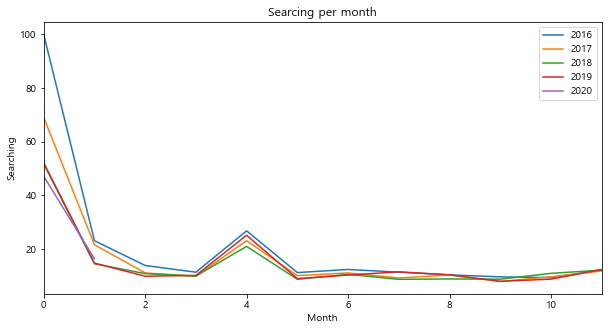

In [290]:
per_year.plot()
plt.xlabel('Month')
plt.ylabel('Searching')
plt.title("Searcing per month")

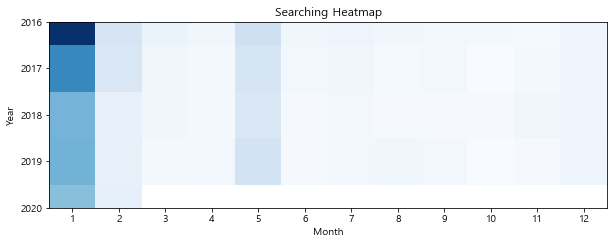

In [317]:
# construct and plot heatmap
plt.rcParams['figure.figsize'] = [10, 15]

orders = [per_year[i][0:12].values for i in df.year.unique()]

y_t = list(df.year.unique())

df_1 = pd.DataFrame(orders,
                  columns=df.month[0:12],
                index=y_t)

ax = plt.imshow(df_1, interpolation='nearest', cmap='Blues').axes
ax.set_xticks(range(0,12))
ax.set_xticklabels(df_1.columns)
ax.set_yticks(range(0,5))
ax.set_yticklabels(df_1.index)
plt.xlabel('Month')
plt.ylabel('Year')
plt.title('Searching Heatmap')
ax.grid(False)
plt.show()